In [19]:
%matplotlib inline
from imutils import paths
import argparse
import requests
import cv2
import os
import tensorflow as tf
from scipy.ndimage import convolve
from skimage import feature
from skimage.color import rgb2gray
from PIL import Image
from CV import *

In [20]:
path_text = "C:/Users/hp/Desktop/task/urls_strawberries.txt"

In [21]:
o = open(path_text,"r")
url0 = o.read()
o.close()

In [22]:
urls = url0.split()
print("The number of urls: {}".format(len(urls)))
print("____________________________")
for url in urls[:10]:
    print(url)

The number of urls: 100
____________________________
https://content.assets.pressassociation.io/2018/03/08102108/99d5ca3a-8ee3-4214-a7bd-00d7d0556a04.jpg
http://www.giverecipe.com/wp-content/uploads/2016/05/strawberry-chocolate-cake-1.jpg
https://images-na.ssl-images-amazon.com/images/I/71Cfp51ZuzL._SX355_.jpg
https://greenblender.com/smoothies/wp-content/uploads/2015/12/smoothies-with-strawberries-by-Green-Blender-960x540.jpg
https://images-na.ssl-images-amazon.com/images/I/8143FLAy6GL._SY355_.jpg
https://www.almanac.com/sites/default/files/styles/primary_image_in_article/public/image_nodes/strawberries-1.jpg?itok=M1rx-t2P
https://cdn1.medicalnewstoday.com/content/images/articles/271/271285/three-strawberries.jpg
https://www.thompson-morgan.com/product_images/100/zoom/z-STRA-T72197P-A_h.jpg
https://edge.bonnieplants.com/www/uploads/20180920003336/sequoia-strawberry1.jpg
https://www.bbcgoodfood.com/sites/default/files/guide/guide-image/2013/06/health-benefits-strawberries-main-image-70

In [35]:
import requests
import os

loc_data = './original_images/'
try:
    os.makedirs(loc_data)
except:
    pass
iimage = 0
for url in urls:
    try:
        f = open(loc_data + 'image{:05.0f}.jpg'.format(iimage),'wb')
        f.write(requests.get(url).content)
        f.close()
        iimage += 1
    except Exception as e:
        print("\n{} {}".format(e,url))
        pass


HTTPSConnectionPool(host='www.thompson-morgan.com', port=443): Max retries exceeded with url: /product_images/100/zoom/z-STRA-T72197P-A_h.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),)) https://www.thompson-morgan.com/product_images/100/zoom/z-STRA-T72197P-A_h.jpg

HTTPSConnectionPool(host='www.thompson-morgan.com', port=443): Max retries exceeded with url: /product_images/100/optimised/STRA-T44199-B.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),)) https://www.thompson-morgan.com/product_images/100/optimised/STRA-T44199-B.jpg


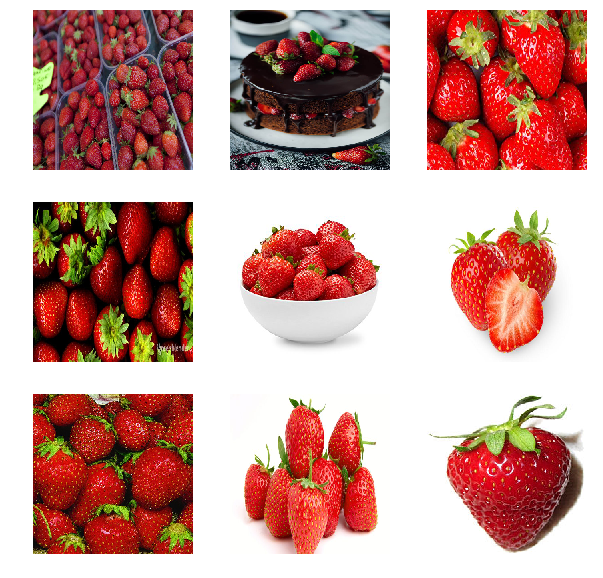

In [37]:
from keras.preprocessing.image import load_img 
import matplotlib.pyplot as plt
from PIL import Image

fnames = os.listdir(loc_data)
fig = plt.figure(figsize=(10,10))
count = 1
for fnm in fnames[:9]:
    img = load_img(loc_data +fnm,target_size=(400,400))
    ax = fig.add_subplot(3,3,count)
    count += 1
    ax.imshow(img)
    ax.axis("off")
plt.show()

In [39]:
import Augmentor
p = Augmentor.Pipeline('./augumented_images/')

C:\Users\hp\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Initialised with 92 image(s) found.
Output directory set to ./augumented_images/output.

In [40]:
p.rotate(probability=0.7, max_left_rotation=15, max_right_rotation=15)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)

In [44]:
from PIL import Image
im = Image.new("RGBA",(100,100))
im = im.convert("RGB")
im.save("test.jpg")
p.sample(930)


Executing Pipeline:   0%|                                                                | 0/930 [00:00<?, ? Samples/s]C:\Users\hp\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
Processing <PIL.Image.Image image mode=RGB size=800x600 at 0x279D9B17E48>:  10%| | 95/930 [00:51<07:33,  1.84 Samples/s]                    


AttributeError: 'OSError' object has no attribute 'message'

In [55]:
from openpyxl.drawing.image import Image
import PIL.Image

p.sample(94, multi_threaded=False)

p = Augmentor.Pipeline('./augumented_images/')
p.ground_truth("/path/to/ground_truth_images")
p.rotate(probability=1, max_left_rotation=15, max_right_rotation=15)
p.flip_left_right(probability=0.5)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_top_bottom(probability=0.5)
p.sample(10)

p = Augmentor.DataPipeline(images, y)
p.rotate(1, max_left_rotation=15, max_right_rotation=15)
p.flip_top_bottom(0.5)
p.zoom_random(1, percentage_area=0.5)

augmented_images, labels = p.sample(94)


Processing image00085.jpg: 100%|█████████████████████████████████████████████████| 94/94 [00:32<00:00,  2.88 Samples/s]
C:\Users\hp\Anaconda\lib\site-packages\PIL\TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Initialised with 184 image(s) found.
Output directory set to ./augumented_images/output.

0 ground truth image(s) found.


Processing <PIL.Image.Image image mode=RGB size=1200x1800 at 0x279D9BD41D0>:  40%|▍| 4/10 [00:01<00:01,  3.38 Samples/s]


AttributeError: 'OSError' object has no attribute 'message'

In [63]:
from PIL import Image
import os.path, sys

image_path = 'C:\\Users\\hp\\augumented_images\\output'
dirs = os.listdir(image_path)

def crop():
    for item in dirs:
        fullpath = os.path.join(image_path,item)         
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.crop((30, 10, 1024, 1004)) 
            imCrop.save(f + 'Cropped.bmp', "BMP", quality=100)

crop()

OSError: [Errno 28] No space left on device

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


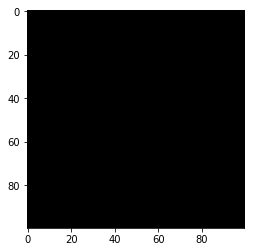

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets


def onselect(eclick, erelease):
    if eclick.ydata>erelease.ydata:
        eclick.ydata,erelease.ydata=erelease.ydata,eclick.ydata
    if eclick.xdata>erelease.xdata:
        eclick.xdata,erelease.xdata=erelease.xdata,eclick.xdata
    ax.set_ylim(erelease.ydata,eclick.ydata)
    ax.set_xlim(eclick.xdata,erelease.xdata)
    fig.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
filename = 'test.jpg'
im = PIL.Image.open(filename)
arr = np.asarray(im)
plt_image=plt.imshow(arr)
rs=widgets.RectangleSelector(
    ax, onselect, drawtype='box',
    rectprops = dict(facecolor='red', edgecolor = 'black', alpha=0.5, fill=True))
plt.show()

In [87]:
import argparse
import cv2

refPt = []
cropping = False
 
def click_and_crop(event, x, y, flags, param):

    global refPt, cropping
 
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True
        
    elif event == cv2.EVENT_LBUTTONUP:
        refPt.append((x, y))
        cropping = False
 
        cv2.rectangle(image, refPt[0], refPt[1], (0, 255, 0), 2)
        cv2.imshow("image", image)

In [91]:
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="Path to the image")
args = vars(ap.parse_args())
 
image = cv2.imread(args["image"])
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", click_and_crop)

while True:

    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF
 
    if key == ord("r"):
        image = clone.copy()
 

    elif key == ord("c"):
        break
 
 
if len(refPt) == 2:
    roi = clone[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
    cv2.imshow("ROI", roi)
    cv2.waitKey(0)
 

cv2.destroyAllWindows()

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: unrecognized arguments: -p proto -m amodel


SystemExit: 2

C:\Users\hp\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [92]:
import glob
import os
import pandas as pd

files_dir = 'C:/Users/hp/augumented_images/output' 
files = glob.glob(os.path.join(files_dir, '*'))
df = pd.DataFrame(columns=['name', 'id', 'hyperlink'])

for i, full_filename in enumerate(files):
    filename = os.path.basename(full_filename)
    name, id_ = filename.split('/')
    id_ = os.path.splitext(id_)[0] 
    hyperlink = '=HYPERLINK("file:///{}")'.format(full_filename)
    df.loc[i] = [name, id_, hyperlink]

df.to_excel('output_file.xlsx', index=False)

ValueError: not enough values to unpack (expected 2, got 1)